<a href="https://colab.research.google.com/github/tjdux/ML/blob/main/17__neural_network_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 손실 곡선
`<tensorflow.python.keras.callbacks.History at ~>`
  - `fit()` 메서드의 실행 결과를 출력한 것
  - `fit()` 메서드는 `History` 클래스 객체를 반환
  - `History` 객체에는 훈련 과정에서 계산한 지표가 저장

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# 모델을 만드는 함수
def model_fn(a_layer=None):
  model=keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  # 은닉층 뒤에 또 하나의 층을 추가
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [3]:
model = model_fn()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# verbose=0: 훈련 과정 나타내지 않기
# history 객체 저장
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [5]:
# history 딕셔너리 확인
history.history.keys()
# 손실과 정확도는 에포크마다 계산한 값이 순서대로 나열된 단순한 리스트

dict_keys(['accuracy', 'loss'])

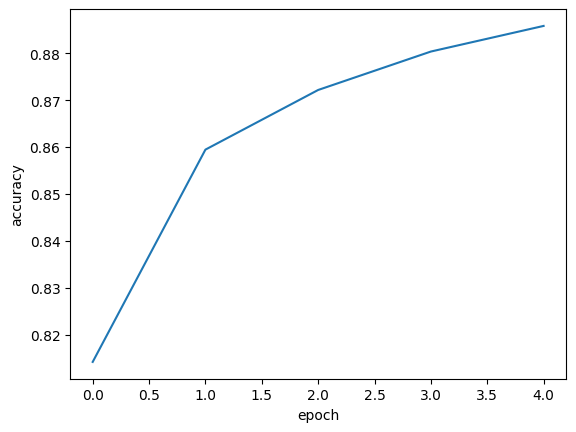

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

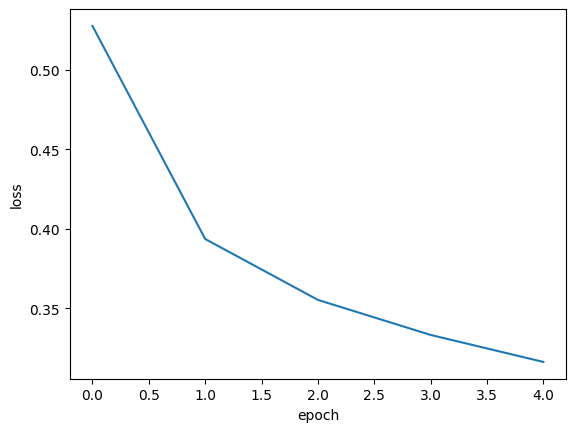

In [8]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


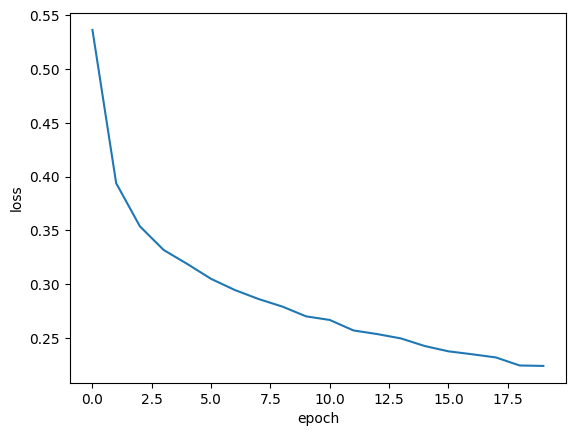

In [9]:
# 에포크 횟수 20으로 늘리기

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 검증 손실
- 확률적 경사 하강법: 과대/과소 적합과 에포크 사이의 관계
  - 에포크가 많아질수록 과대 적합 위험성 증가
- 인공 신경망 모델이 최적화하는 대상은 정확도가 아닌 손실 함수 (손실 감소에 비례하여 정확도가 높아진다는 보장 ❌) ➡️ 모델이 잘 훈련되었는지 판단하려면 정확도 보다는 손실 함수의 값을 확인
- 과대적합 / 과소적합을 판단하려면 훈련 세트에 대한 점수 뿐만 아니라 검증 세트에 대한 점수도 필요

In [10]:
# 검증 세트 추가

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

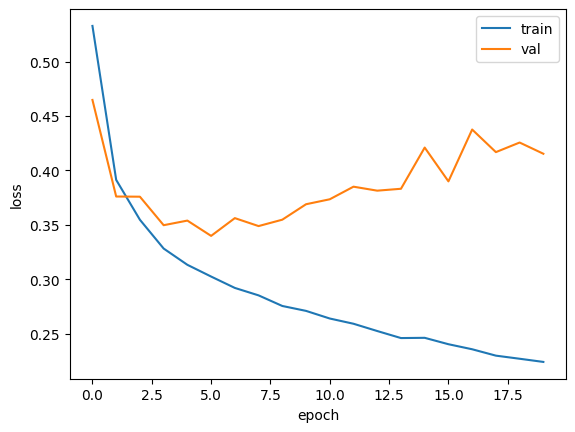

In [12]:
# 훈련 손실과 검증 손실 그래프 그리기

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- 검증 손실이 다섯 번째 에포크 만에 다시 상승 ➡️ 훈련 손실을 꾸준히 감소하기 때문에 전형적인 과대적합 모델
- 검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실이 줄어들 뿐만 아니라 검증 세트에 대한 정확도도 증가할 것

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


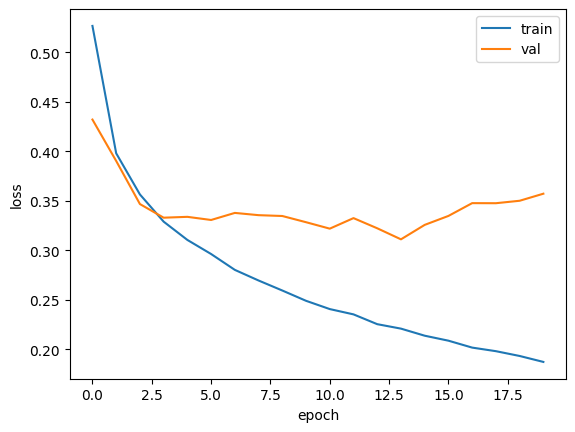

In [13]:
# 옵티마이저 하이퍼파라미터를 조정하여 과대적합 완화
# Adam: 적응적 학습률을 사용하기 때문에 에포크가 진행되면서 학습률 크기 조정 가능

model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 드롭아웃 (dropout)
- 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 (뉴런의 출력을 0으로 만들어) 과대적합 방지
- 얼마나 많은 뉴런을 드롭할지는 또 다른 하이퍼파라미터
- 드롭아웃이 과대적합을 막을 수 있는 이유
  - 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해서 주의를 기울여야 함
  - 드롭아웃된 각각의 신경망 모델들을 마치 앙상블 하는 것처럼 생각할 수 있음
- `Dropout` 클래스
  - 어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만드는 것
  - 층처럼 사용되지만 훈련되는 모델 파라미터는 없음

In [14]:
# 30% 정도를 드롭아웃

model = model_fn(keras.layers.Dropout(0.3))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

- `dropout`
  - 훈련되는 모델 파라미터 없음
  - 입력과 출력의 크기가 동일
- 훈련이 끝난 뒤 평가나 예측을 수행할 때는 드롭아웃을 적용하지 말아야 함
  - 텐서플로와 케라스는 모델을 평가, 예측할 때는 자동으로 드롭아웃을 적용하지 않음

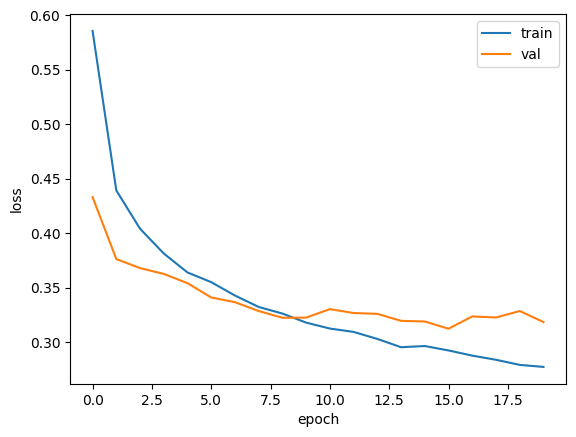

In [15]:
# 드롭아웃을 사용한 모델의 훈련 손실과 검증 손실 그래프

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- 20번의 에포크 동안 훈련한 것이기 때문에 결국 다소 과대적합

## 모델 저장과 복원


In [17]:
# 에포크 횟수 10

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


- `save_weights()`: 훈련된 모델의 파라미터를 저장
- `save()`: 모델 구조와 모델 파라미터를 함께 저장

In [20]:
model.save_weights('model-weights.weights.h5')
model.save('model-whole.h5')

In [21]:
!ls -al *.h5

-rw-r--r-- 1 root root 976600 Jun  3 13:55 model-weights.weights.h5
-rw-r--r-- 1 root root 978584 Jun  3 13:55 model-whole.h5


### 새로운 모델 + 저장된 파라미터 사용

In [23]:
# 모델 만든 후 저장된 모델 파라미터 적재

model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.weights.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


- `predict()`
  - 샘플마다 10개의 클래스에 대한 확률을 반환
  - 이진 분류 문제라면 양성 클래스에 대한 확률 하나만 반환

In [27]:
import numpy as np

# 각 샘플에서 확률이 제일 큰 클래스
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
# 정확도 출력
print(np.mean(val_labels == val_target))

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.8881666666666667


### 저장한 모델 사용

In [29]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8895 - loss: 0.3212


[0.3233748972415924, 0.8881666660308838]

## 콜백 (callback)
- 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
- `fit()`의 `callbacks` 매개변수에 리스트로 전달하여 사용
- `ModelCheckpoint`: 에포크마다 모델을 저장
  - `save_best_only=True`: 가장 낮은 검증 손실을 만드는 모델을 저장

In [33]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
# 저장한 모델을 다시 읽어서 예측 수행

model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8882 - loss: 0.3169


[0.31965234875679016, 0.8863333463668823]

## 조기 종료 (early stopping)
- 과대적합이 시작되기 전에 훈련을 미리 중지하는 것
- 훈련 에포크 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아 주기 때문에 규제 방법 중 하나
- `EarlyStopping`
  - `patience` 매개변수: 검증 점수가 향상되지 않더라도 참을 에포크 횟수 지정
  - `restore_best_weights=True`: 가장 낮은 검증 손실을 낸 모델 파라미터로 **되돌림**

In [35]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
# 몇 번째 에포크에서 훈련이 중지되었는지 확인

early_stopping_cb.stopped_epoch

15

- 열 여섯번째 에포크에서 훈련이 중지
- `patiecne=2`로 지정했으므로 최상의 모델은 14번째 에포크

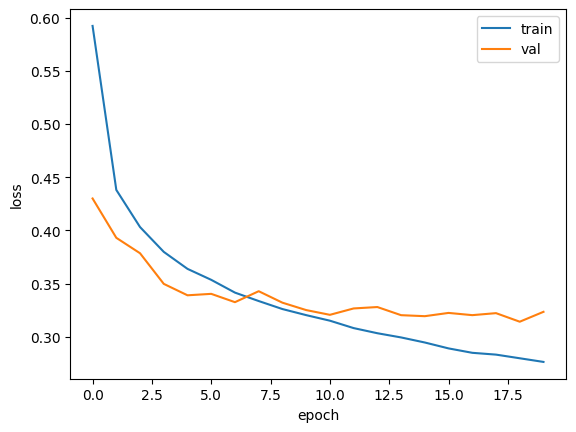

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [39]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8878 - loss: 0.3184


[0.3199426233768463, 0.8880000114440918]